In [2]:
import time
import pandas as pd
import numpy as np
import sys
import pickle

from SP2XR_toolkit import *

# Load data

In [2]:
main_path = '/data/user/bertoz_b/SP2XR/data/NyA/SP2XR_pbp_parquet/date=2019-06-25'

pbp_calib = pd.read_parquet(main_path)# + '/SP2XR_pbp_parquet/',
                           # filters=[('date', '>=', '2019-06-25 00:00:00'), ('date', '<=', '2019-06-25 00:00:00')])

In [3]:
(200**3)*np.pi*4/3

33510321.638291124

# Create a calibration dictionary

In [12]:
calib_dict = {
    'FS_70':{
        'folder_name': '20190625080742',
        'type': 'FS',
        'mass': None,
        'diam': 70,
        'n_modes': 1,
        'mu': [7e5],
        'sigma': [1.2],
        'N': [600],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [1e5, 1e6]
        },
    'FS_520':{
        'folder_name': '20190625081533',
        'type': 'FS',
        'mass': None,
        'diam': 520,
        'n_modes': 2,
        'mu': [2e8, 8e8],
        'sigma': [1.2, 1.2],
        'N': [600, 300],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [5e7, 2e9]
        },
    'FS_480':{
        'folder_name': '20190625083435',
        'type': 'FS',
        'mass': None,
        'diam': 480,
        'n_modes': 2,
        'mu': [1e8, 8e8],
        'sigma': [1.2, 1.2],
        'N': [300, 100],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [3e7, 1e9]
        },
    'FS_430':{
        'folder_name': '20190625085332',
        'type': 'FS',
        'mass': None,
        'diam': 430,
        'n_modes': 2,
        'mu': [1e8, 4e8],
        'sigma': [1.2, 1.2],
        'N': [300, 100],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [6e7, 1e9]
        },
    'FS_380':{
        'folder_name': '20190625090839',
        'type': 'FS',
        'mass': None,
        'diam': 380,
        'n_modes': 2,
        'mu': [1e8, 5e8],
        'sigma': [1.2, 1.2],
        'N': [300, 100],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [2e7, 4e8]
        },
    'FS_340':{
        'folder_name': '20190625091710',
        'type': 'FS',
        'mass': None,
        'diam': 340,
        'n_modes': 2,
        'mu': [7e7, 2e8],
        'sigma': [1.2, 1.2],
        'N': [300, 100],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [1e7, 5e8]
        },
    'FS_300':{
        'folder_name': '20190625092444',
        'type': 'FS',
        'mass': None,
        'diam': 300,
        'n_modes': 2,
        'mu': [6e7, 2e8],
        'sigma': [1.1, 1.1],
        'N': [500, 50],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [1e7, 7e8]
        },
    'FS_260':{
        'folder_name': '20190625093530',
        'type': 'FS',
        'mass': None,
        'diam': 260,
        'n_modes': 2,
        'mu': [3e7, 1e8],
        'sigma': [1.2, 1.2],
        'N': [300, 100],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [8e6, 2e8]
        },

    'FS_220':{
        'folder_name': '20190625094413',
        'type': 'FS',
        'mass': None,
        'diam': 220,
        'n_modes': 2,
        'mu': [2e7, 9e7],
        'sigma': [1.2, 1.2],
        'N': [300, 100],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [3e6, 1e8]
        },
    'FS_180':{
        'folder_name': '20190625095341',
        'type': 'FS',
        'mass': None,
        'diam': 180,
        'n_modes': 2,
        'mu': [1e7, 4e7],
        'sigma': [1.2, 1.2],
        'N': [300, 100],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [2e6, 8e7]
        },
    'FS_160':{
        'folder_name': '20190625100133',
        'type': 'FS',
        'mass': None,
        'diam': 160,
        'n_modes': 2,
        'mu': [7e6, 3e7],
        'sigma': [1.2, 1.2],
        'N': [300, 100],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [1e6, 5e7]
        },
    'FS_540':{
        'folder_name': '20190625100902',
        'type': 'FS',
        'mass': None,
        'diam': 540,
        'n_modes': 2,
        'mu': [2e8, 8e8],
        'sigma': [1.1, 1.1],
        'N': [300, 50],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [5e7, 2e9]
        },
    'FS_140':{
        'folder_name': '20190625125538',
        'type': 'FS',
        'mass': None,
        'diam': 140,
        'n_modes': 2,
        'mu': [5e6, 2e7],
        'sigma': [1.2, 1.2],
        'N': [300, 100],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [1e6, 3e7]
        },
    'FS_120':{
        'folder_name': '20190625125954',
        'type': 'FS',
        'mass': None,
        'diam': 120,
        'n_modes': 2,
        'mu': [2e6, 1e7],
        'sigma': [1.2, 1.2],
        'N': [100, 100],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [7e5, 2e7]
        },
    'FS_100':{
        'folder_name': '20190625130340',
        'type': 'FS',
        'mass': None,
        'diam': 100,
        'n_modes': 2,
        'mu': [2e6, 7e6],
        'sigma': [1.2, 1.2],
        'N': [100, 300],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [5e5, 1e7]
        },
    'FS_90':{
        'folder_name': '20190625130820',
        'type': 'FS',
        'mass': None,
        'diam': 90,
        'n_modes': 2,
        'mu': [1e6, 5e6],
        'sigma': [1.2, 1.2],
        'N': [100, 200],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [5e5, 5e6]
        },
    'FS_80':{
        'folder_name': '20190625131458',
        'type': 'FS',
        'mass': None,
        'diam': 80,
        'n_modes': 2,
        'mu': [9e5, 3e6],
        'sigma': [1.1, 1.1],
        'N': [100, 300],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [2e5, 4e6]
        },
    'FS_60':{
        'folder_name': '20190625131945',
        'type': 'FS',
        'mass': None,
        'diam': 60,
        'n_modes': 1,
        'mu': [3e5],
        'sigma': [1.2],
        'N': [300],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [1e5, 6e5]
        }

    }


'''
'FS_50':{
        'folder_name': '20190625132548',
        'type': 'FS',
        'mass': None,
        'diam': 50,
        'n_modes': 2,
        'mu': [6e7, 2e8],
        'sigma': [1.2, 1.2],
        'N': [300, 100],
        'nbins': 100,
        'bins_range': [],
        'fit_range': [1e5, 2e9]
        }
'''

"\n'FS_50':{\n        'folder_name': '20190625132548',\n        'type': 'FS',\n        'mass': None,\n        'diam': 50,\n        'n_modes': 2,\n        'mu': [6e7, 2e8],\n        'sigma': [1.2, 1.2],\n        'N': [300, 100],\n        'nbins': 100,\n        'bins_range': [],\n        'fit_range': [1e5, 2e9]\n        }\n"

# Load previous calib for comparison

In [17]:
previous_calib_to_append = {}

FS_DMA_fit_20190625 = pd.read_csv('/data/user/bertoz_b/SP2XR/sp2xr_nya/XR_NyA_FS_Cal_25062019.txt',
                                  sep='\t', names=['AD', 'mass'], header=None, skiprows=1).dropna(subset=['AD'])
FS_DMA_fit_20190625.columns = ['ph', 'mass']
FS_DMA_fit_20190625.sort_values(by='mass', inplace=True)
previous_calib_to_append['FS_DMA_fit_20190625'] = {'label': 'FS DMA 20190625',
                                                   'color': 'C6',
                                                   'ls': '-',
                                                   'marker': '',
                                                   'mass':FS_DMA_fit_20190625['mass'],
                                                   'peak': FS_DMA_fit_20190625['ph']}

# Perform calibration

/data/user/bertoz_b/SP2XR/sp2xr_nya/sp2xr/SP2XR_toolkit.py:1298: RuntimeWarning: invalid value encountered in log10
  Yfit += N / (np.log10(sigma) * np.sqrt(2 * np.pi)) * np.exp(-((np.log10(x / mu)) ** 2) / (2 * np.log10(sigma) ** 2))
/data/user/bertoz_b/SP2XR/sp2xr_nya/sp2xr/SP2XR_toolkit.py:1298: RuntimeWarning: invalid value encountered in log10
  Yfit += N / (np.log10(sigma) * np.sqrt(2 * np.pi)) * np.exp(-((np.log10(x / mu)) ** 2) / (2 * np.log10(sigma) ** 2))
/data/user/bertoz_b/SP2XR/sp2xr_nya/sp2xr/SP2XR_toolkit.py:1298: RuntimeWarning: invalid value encountered in log10
  Yfit += N / (np.log10(sigma) * np.sqrt(2 * np.pi)) * np.exp(-((np.log10(x / mu)) ** 2) / (2 * np.log10(sigma) ** 2))
/data/user/bertoz_b/SP2XR/sp2xr_nya/sp2xr/SP2XR_toolkit.py:1298: RuntimeWarning: invalid value encountered in log10
  Yfit += N / (np.log10(sigma) * np.sqrt(2 * np.pi)) * np.exp(-((np.log10(x / mu)) ** 2) / (2 * np.log10(sigma) ** 2))
/data/user/bertoz_b/SP2XR/sp2xr_nya/sp2xr/SP2XR_toolkit.py:1

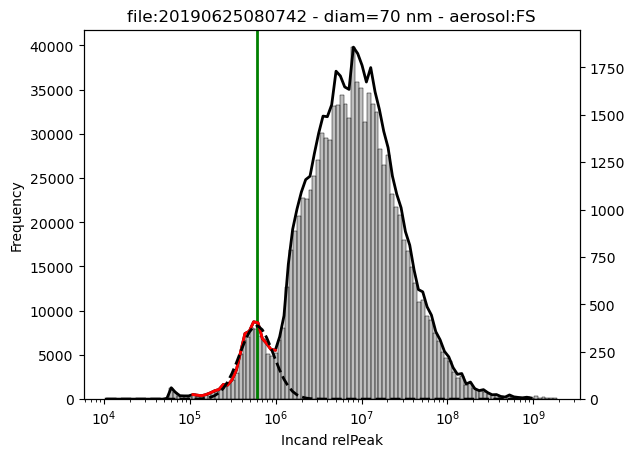

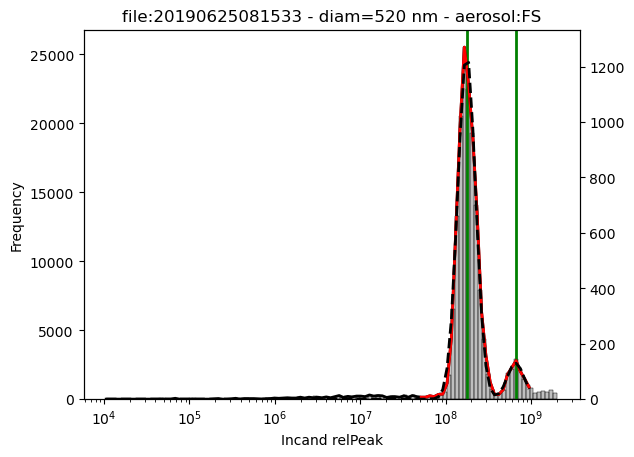

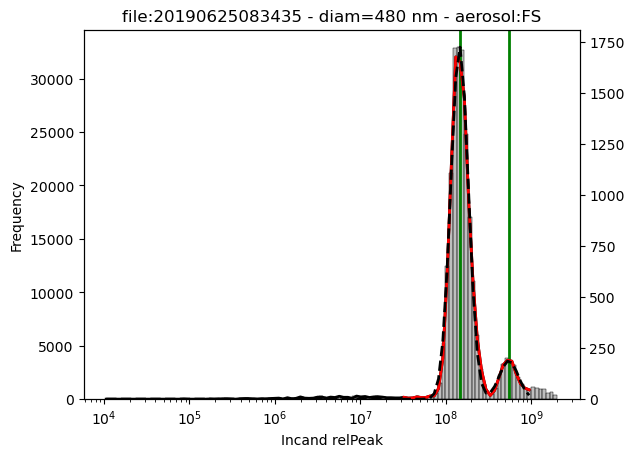

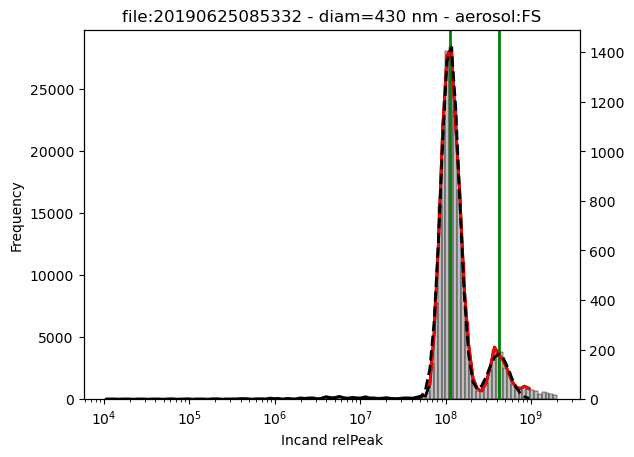

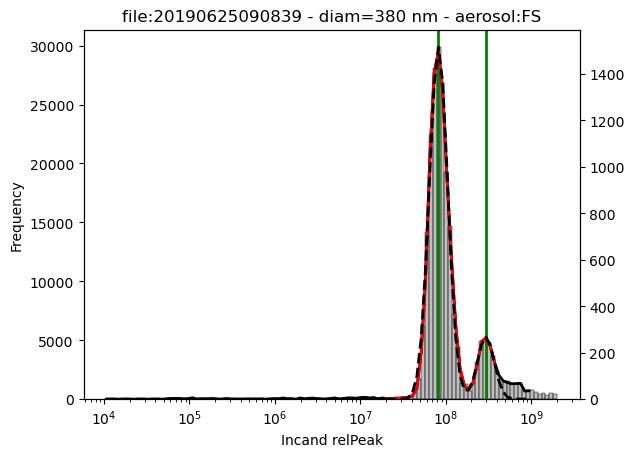

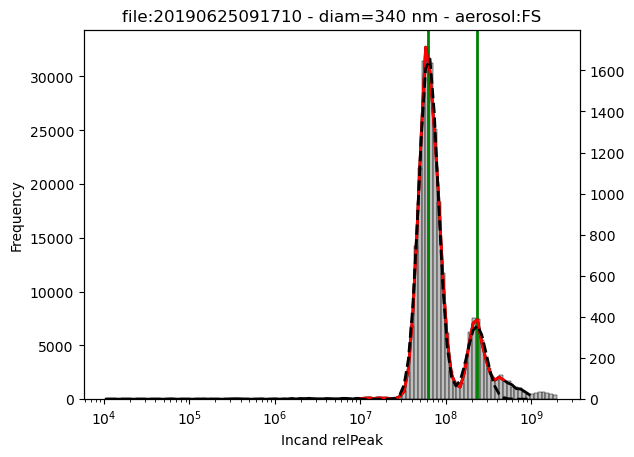

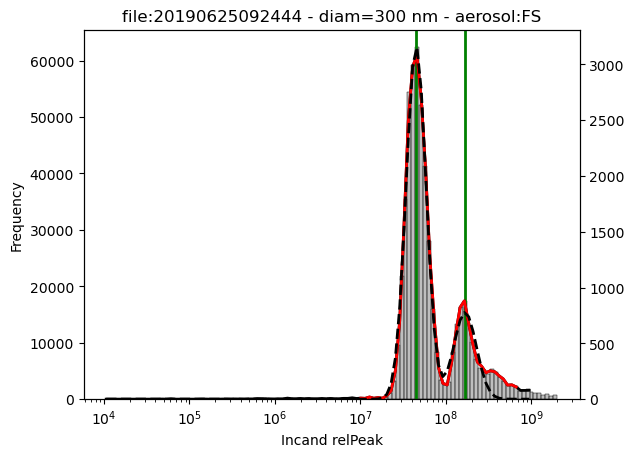

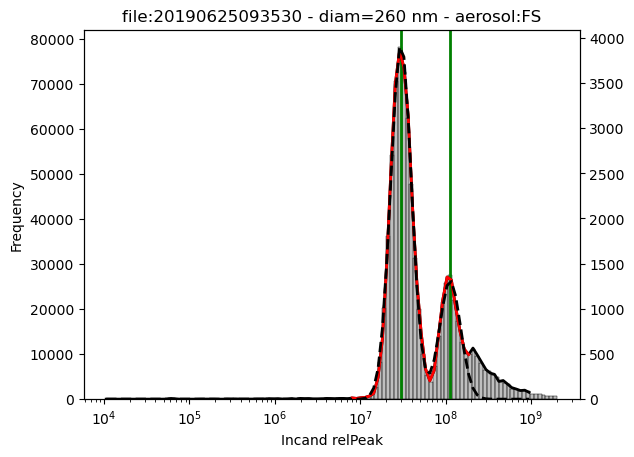

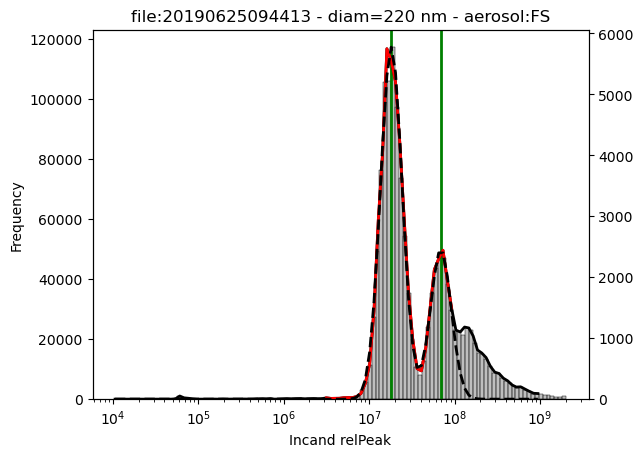

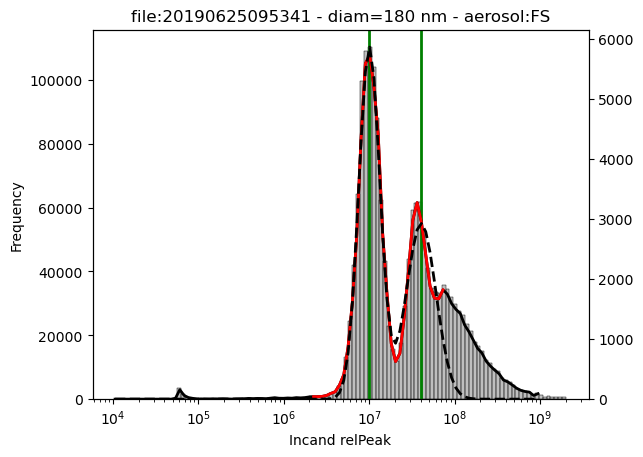

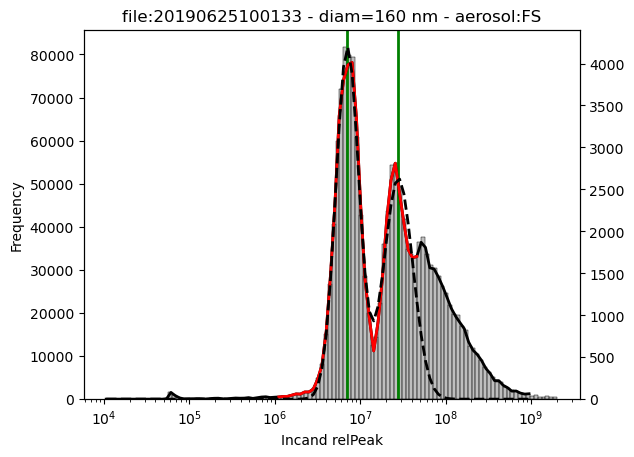

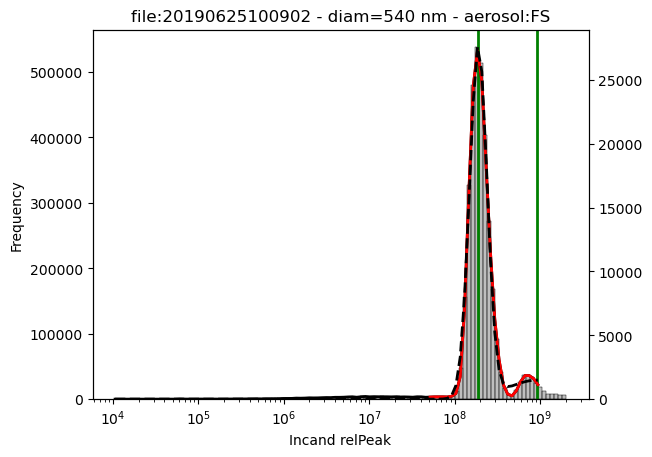

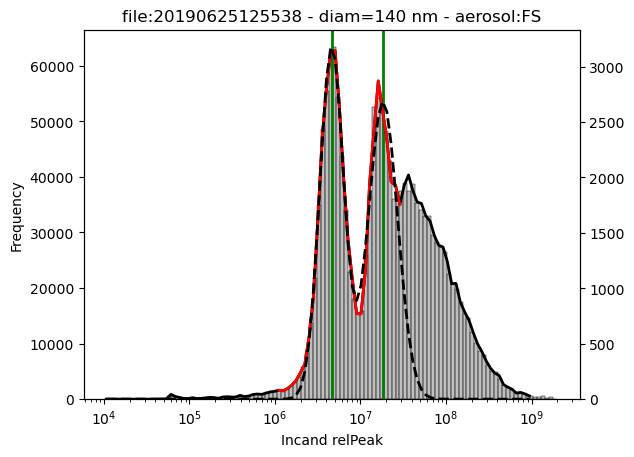

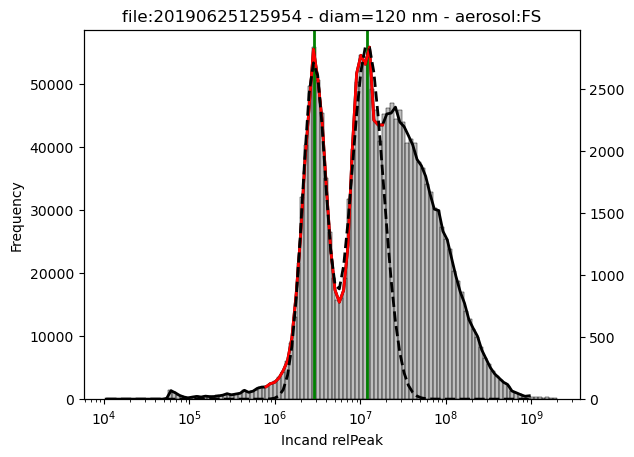

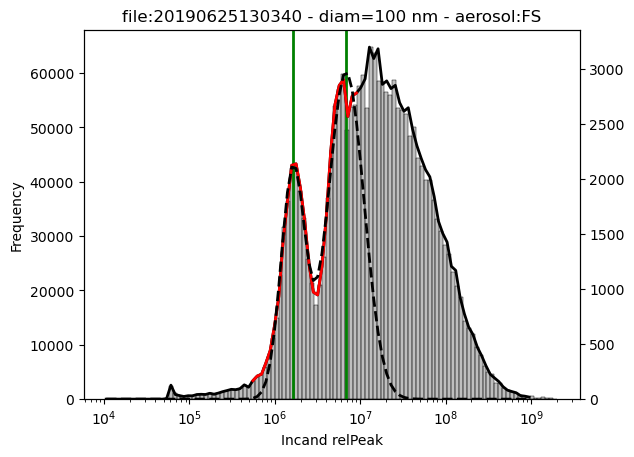

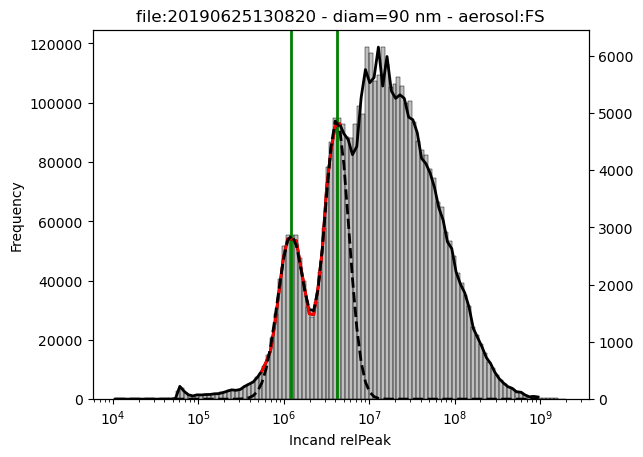

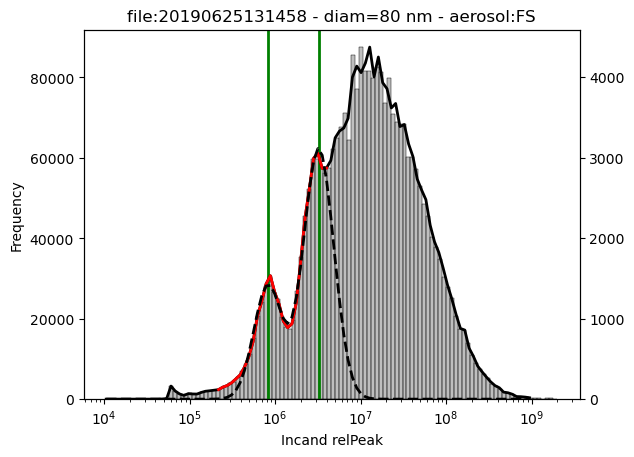

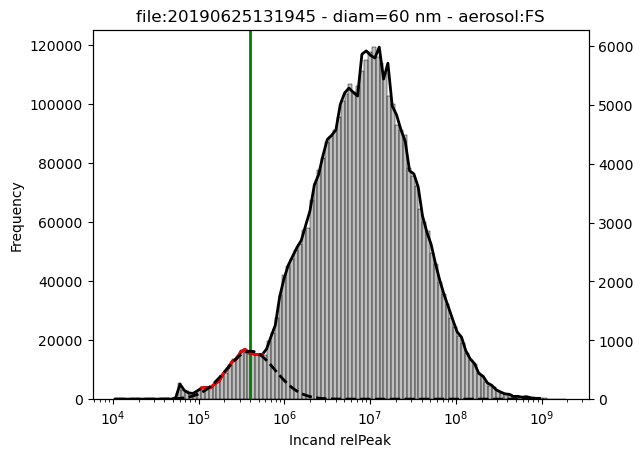

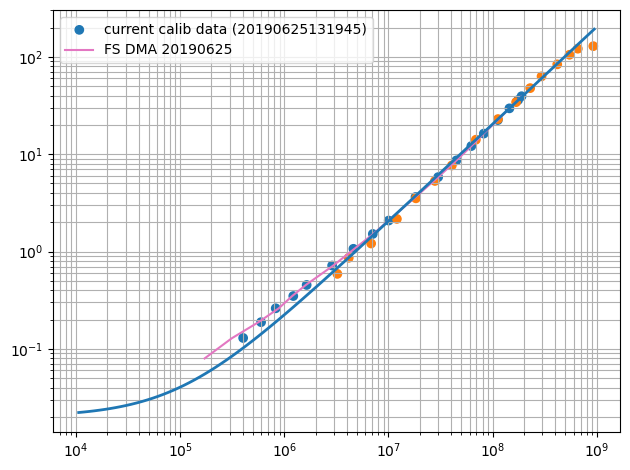

In [18]:
calib_dict, popt = calculate_calib_coeff(pbp_calib, calib_dict,
                                         size_selection_method='DMA',
                                         calib_material='FS_PSI_2010', rho_eff=1800,
                                         fit='polynomial', fit_p0=[0.025, 2.04e-7], bounds=((0.020, 2.038e-7), (0.030, 2.041e-7)), save_calib_coeff=True,
                                         append_calib_curve=previous_calib_to_append, # this is meant to be for comaprison with previous calibrations
                                         save_peak_hist_lognorm_fit_params=True,
                                         do_peak_histogram_plots=True, save_peak_histogram_plots=True,
                                         do_calib_curve_plot=True, save_calib_curve_plot=True,
                                         plot_dir='example_calib_plots/')